## Book Dataset Analysis 
Neha Uppin

### Importing 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('Amazon-books.csv')

df.head()

,Title,Rank,Reviews,Review Count,Price,Genre,Manufacturer,Brand,Author,Number of Pages
0,"Fourth Wing (The Empyrean, 1)",1,4.8,135916,18.69,Fantasy,Entangled: Red Tower Books,Macmillan,Rebecca Yarros,528.0
1,Atomic Habits: An Easy & Proven Way to Build G...,2,4.8,120356,12.50,Personal Transformation,Avery,Avery,James Clear,320.0
2,"Iron Flame (The Empyrean, 2)",3,4.7,79851,14.78,Epic,Entangled: Red Tower Books,Kiligry,Rebecca Yarros,640.0
3,"Dinner Tonight: 100 Simple, Healthy Recipes fo...",4,4.1,6,26.00,Natural Foods,William Morrow Cookbooks,NaN,Alex Snodgrass,256.0
4,Oath and Honor: A Memoir and a Warning,5,4.8,3536,21.49,Political,"Little, Brown and Company",NaN,Liz Cheney,384.0


### Profiling

#### Data Structure Overview
This dataset has 4846 rows and 10 columns, with a mix of numeric and categorical data types. All the columns seem to stored as an appropriate type, however, I would make the change to store 'Number of Pages' as an integer, because it is unlikely to have a fraction of a page in a book. 

Looking at numeric statistics, the book prices range dramatically from 0.15 to 199.9. The mean at 13.10 and the median is at 11.10. The higher mean could indicate that there are some high-value outliers pulling the average upwards. The number of book pages range from 1 to 5280. A book with 1 page seems highly unlikely, it would be interesting to see what these entries are. 

Looking at statistics for all columns, the most common genre being Fantasy, with 176 occurences. It also looks like some repeat titles, which could indicate different editions of the same book, the book being in different formats (hardcover vs. paperback), or even different books with the same title. 

In [3]:
# overview of dataframe
display(df.info())

# numeric stats
display(df.describe().round(2))

# stats for all 
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            4846 non-null   object 
 1   Rank             4846 non-null   int64  
 2   Reviews          4846 non-null   float64
 3   Review Count     4846 non-null   int64  
 4   Price            4846 non-null   float64
 5   Genre            4846 non-null   object 
 6   Manufacturer     4846 non-null   object 
 7   Brand            3144 non-null   object 
 8   Author           4846 non-null   object 
 9   Number of Pages  4775 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 378.7+ KB


None

,Rank,Reviews,Review Count,Price,Number of Pages
count,4846.00,4846.00,4846.00,4846.00,4775.00
mean,2533.39,4.66,12735.63,13.10,347.74
std,1500.59,0.23,28780.36,10.25,415.87
min,1.00,1.00,1.00,0.15,1.00
25%,1242.75,4.60,943.50,7.41,128.00
50%,2501.50,4.70,4010.00,11.10,272.00
75%,3768.75,4.80,12033.00,15.67,408.00
max,15176.00,5.00,621499.00,199.99,5280.00


,Title,Rank,Reviews,Review Count,Price,Genre,Manufacturer,Brand,Author,Number of Pages
count,4846,4846.000000,4846.000000,4846.000000,4846.000000,4846,4846,3144,4846,4775.000000
unique,4758,NaN,NaN,NaN,NaN,907,972,758,2901,NaN
top,Goodnight Moon,NaN,NaN,NaN,NaN,Fantasy,Independently published,Scholastic,Calendars Workman,NaN
freq,3,NaN,NaN,NaN,NaN,176,345,98,40,NaN
mean,NaN,2533.388774,4.662299,12735.633306,13.098601,NaN,NaN,NaN,NaN,347.739686
std,NaN,1500.594167,0.225194,28780.356812,10.248512,NaN,NaN,NaN,NaN,415.874433
min,NaN,1.000000,1.000000,1.000000,0.150000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,1242.750000,4.600000,943.500000,7.412500,NaN,NaN,NaN,NaN,128.000000
50%,NaN,2501.500000,4.700000,4010.000000,11.100000,NaN,NaN,NaN,NaN,272.000000
75%,NaN,3768.750000,4.800000,12033.000000,15.667500,NaN,NaN,NaN,NaN,408.000000


#### Data Quality Overview
Most of the data is complete, except for 'Brand', which has 1702 null values and 'Pages' which has 71 null values.

It looks like none of the columns have unique values, which makes sense for most columns such as price, genre, author and number of pages. As mentioned before, there are a few reason why titles are not unique. It is quite interesting why the ranks are not unique and it looks like there are 819 books that have duplicate ranks. Since it is unsure how often this data was collected (weekly, monthly), we only know that it covers the beginning to the end of 2023, so it could be because books held different ranks at different times of the year. 

In [4]:
df['Rank'].value_counts()
df[df['Rank'] == 3396]

,Title,Rank,Reviews,Review Count,Price,Genre,Manufacturer,Brand,Author,Number of Pages
3268,Everything Is F*cked,3396,4.6,11941,10.81,Happiness,Harper Paperbacks,Harper Paperbacks,Mark Manson,288.0
3269,My First 100 Words - Mis Primeras 100 Palabras...,3396,4.8,1549,5.91,Spanish,Parragon Books,Parragon Books,Press Cottage,32.0
3270,Animal Crossing: New Horizons 2024 Day-to-Day ...,3396,4.5,23,13.82,Video Games,Harry N Abrams Inc.,NaN,Nintendo Nintendo,740.0


In [5]:
# missing values per column
display(df.isnull().sum())

# distinct values per column
display(df.nunique())

# duplicate values per column 
print('Number of duplicates per column')
for col in df.columns:
    duplicates = df[col].duplicated().sum()
    print(f'{col}: {duplicates}')

Title                 0
Rank                  0
Reviews               0
Review Count          0
Price                 0
Genre                 0
Manufacturer          0
Brand              1702
Author                0
Number of Pages      71
dtype: int64

Title              4758
Rank               4027
Reviews              24
Review Count       3764
Price              1741
Genre               907
Manufacturer        972
Brand               758
Author             2901
Number of Pages     630
dtype: int64

Number of duplicates per column
Title: 88
Rank: 819
Reviews: 4822
Review Count: 1082
Price: 3105
Genre: 3939
Manufacturer: 3874
Brand: 4087
Author: 1945
Number of Pages: 4215


### Data Cleaning
- Renamed the 'Reviews' column to 'Rating' for clarity
- Changed the data type to integer for 'Number of Pages' because pages are whole numbers and this seems more logical

In [6]:
# rename 'Reviews' to 'Rating'
df.rename(columns = {'Reviews' : 'Rating'}, inplace=True)

# change 'Number of Pages' dtype to an integer
df['Number of Pages'] = df['Number of Pages'].astype('Int64')

df.head()

,Title,Rank,Rating,Review Count,Price,Genre,Manufacturer,Brand,Author,Number of Pages
0,"Fourth Wing (The Empyrean, 1)",1,4.8,135916,18.69,Fantasy,Entangled: Red Tower Books,Macmillan,Rebecca Yarros,528
1,Atomic Habits: An Easy & Proven Way to Build G...,2,4.8,120356,12.50,Personal Transformation,Avery,Avery,James Clear,320
2,"Iron Flame (The Empyrean, 2)",3,4.7,79851,14.78,Epic,Entangled: Red Tower Books,Kiligry,Rebecca Yarros,640
3,"Dinner Tonight: 100 Simple, Healthy Recipes fo...",4,4.1,6,26.00,Natural Foods,William Morrow Cookbooks,NaN,Alex Snodgrass,256
4,Oath and Honor: A Memoir and a Warning,5,4.8,3536,21.49,Political,"Little, Brown and Company",NaN,Liz Cheney,384


### Topic Specific Analysis
The following cells contain data analysis for Price, Rating and Genre

#### Price Analysis

The price distribution is positively skewed, with a majority of books being within the \$5-15 range. 

There is a dramatic decline after the \$25-50 mark, which indicates that books price above \\$50 are rare. 

When we actually calculate the upper and lower bounds, it looks like the upper bound is $28.05, so anything outside this is considered an outlier. When we look at these books, there are 232 entries that are beyond this. Most of these books seem to specialty items or box sets, which makes sense why they would be more expensive. 

Text(0, 0.5, 'Number of Books')

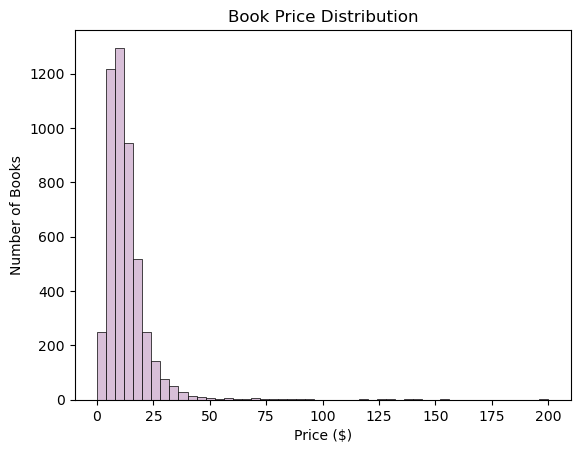

In [7]:
# plot book price distribution
plt.hist(df['Price'], bins=50, color='thistle', edgecolor='black', linewidth=0.5)
plt.title('Book Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Number of Books')

In [8]:
# calculate outlier boundaries using IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print(f'Upper Bound: ${upper}')
print(f'Lower Bound: ${lower.round(2)}')

# find and display books outside the upper bound
books_upper = df[df['Price'] > upper]
books_upper

Upper Bound: $28.05
Lower Bound: $-4.97


,Title,Rank,Rating,Review Count,Price,Genre,Manufacturer,Brand,Author,Number of Pages
51,My Name Is Barbra,53,4.6,2092,30.56,Movie Directors,Viking,NaN,Barbra Streisand,992
52,Harry Potter Paperback Box Set (Books 1-7),55,4.9,103150,29.45,School,Scholastic Inc.,Arthur A. Levine Books,Rowling J,<NA>
53,Hunger Games 4-Book Paperback Box Set (the Hun...,56,4.9,3758,37.18,Difficult Discussions,Scholastic Inc.,NaN,Suzanne Collins,2720
99,Berserk Deluxe Volume 1,102,4.9,15172,28.49,Fantasy,Dark Horse Manga,Dark Horse Manga,Jason DeAngelis,696
151,The Lost Book of Herbal Remedies,155,4.7,17266,42.00,Self-Help,Global Brother,Claude Davis,Davis Claude,304
...,...,...,...,...,...,...,...,...,...,...
4777,The Twilight Saga Complete Collection,5332,4.7,7188,73.66,Children's Books,"Little, Brown Books for Young Readers",NaN,Stephenie Meyer,3520
4796,Japan: The Cookbook,5443,4.8,1327,35.99,Japanese,Phaidon Press,Phaidon Press,Hachisu Nancy,464
4799,The Inheritance Games Collection,5469,4.8,512,32.53,Children's Books,"Little, Brown Books for Young Readers",NaN,Jennifer Lynn Barnes,1152
4814,Divergent Series Box Set (Books 1-4),5559,4.8,1666,33.13,Coming of Age,Harper Collins Children’s Books,HarperCollins Children,Veronica Roth,1616


### Rating Analysis

Looking at just the top 10 highest rated books, all of them have a 5.0 rating. This doesn't necessarily mean they are the most popular because it also depends on the number of reviews the book has.

Instead, the top 25% most reviewed books were looked at. In this case, it was any books that had 12,033 or more reviews. By sorting the book titles that were within this threshold, we can look books with high ratings and a higher count of reviews. It eliminates the issue where a book with 5.0 stars from 1 review appears.

In [9]:
# top 10 highest rated books
top_rated = df.nlargest(10, 'Rating')
top_rated

,Title,Rank,Rating,Review Count,Price,Genre,Manufacturer,Brand,Author,Number of Pages
8,Winter Turning: A Graphic Novel (Wings of Fire...,9,5.0,1,10.39,Animals,Graphix,NaN,Tui T. Sutherland,224
9,"Ruthless Vows (Letters of Enchantment, 2)",10,5.0,1,14.98,Romance,Wednesday Books,NaN,Rebecca Ross,432
270,Claudia and the Bad Joke: A Graphic Novel (The...,280,5.0,1,10.38,Babysitting,Graphix,NaN,Ann M. Martin,192
395,Bob's Burgers 2024 Wall Calendar,411,5.0,62,12.79,Performing Arts,Rizzoli Universe,Universe Publishing,Inc. Twentieth,24
484,More! More! More!,500,5.0,333,14.99,Family Life,Trufflery,NaN,Barbara Rieco,38
644,Berserk Deluxe Volume 5,668,5.0,5866,29.53,Fantasy,Dark Horse Manga,Dark Horse Manga,Kentaro Miura,720
651,Journey of Us: 101 Challenges for Couples,674,5.0,1,14.99,Dating,Independently published,NaN,Amour Editions,205
886,Berserk Deluxe Volume 4,912,5.0,6124,33.73,Fantasy,Dark Horse Manga,Dark Horse Manga,Kentaro Miura,704
1204,Berserk Deluxe Edition 7,1233,5.0,3937,31.49,Fantasy,Dark Horse Manga,Dark Horse Manga,Kentaro Miura,704
1470,50 Cápsulas de Amor Propio: Múltiples maneras ...,1517,5.0,32,16.19,Personal Transformation,Perlas para el Alma,NaN,Sara Espejo,228


<Axes: xlabel='Review Count', ylabel='Title'>

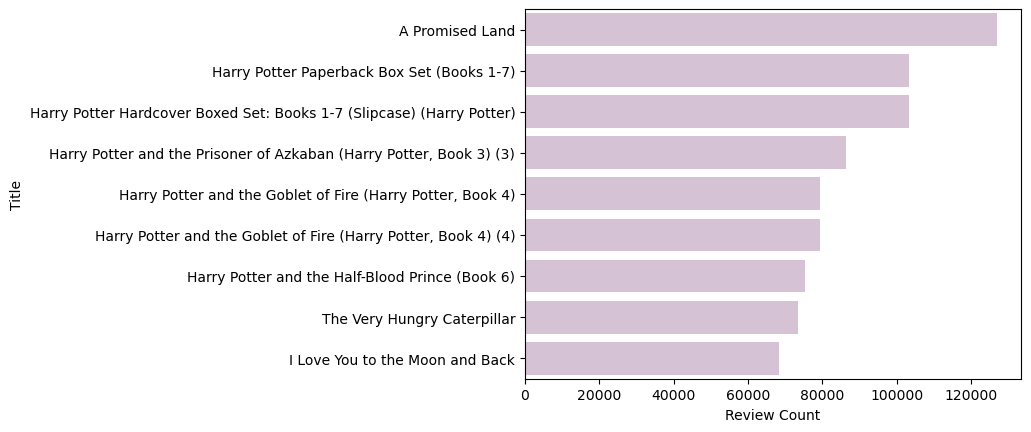

In [10]:
threshold = df['Review Count'].quantile(0.75) # top 25% most-reviewed books
top = df[df['Review Count'] >= threshold]     # show only books greater than threshold

# sorts 'top' by rating and review count and shows only top 10
top_10 = top.sort_values(by=['Rating', 'Review Count'], ascending=False).head(10) 

# plots top 10 rated books that are within the top 25% most reviewed
sns.barplot(data=top_10, x='Review Count', y='Title', color='thistle')

### Genre Analysis 

The top 10 most common genres show that Fantasy has the most book titles with 176 books. This occupies approximately 3.63% of the dataset, which seems rather small considering it is the top genre. However, this makes sense because there seems to be 907 unique genres, as looked at during the inital data exploration. 

When exploring the rating distribution by top genres, a box plot was created. Most genres show median ratings between 4.6 to 4.8, which could indicate that books maintain quality across different genres. The plot shows that Bible have very little variance, with most ratings concentrated between 4.7 to 4.9 reviews. Contemporary and Genre Fiction have the greatest distribution, which makes sense because fiction is a very broad category.

In [11]:
# group by genre and count of titles; gives book count per genre 
genre_count = df.groupby('Genre').agg(book_count=('Title', 'count'))

# sort genre book count and show only top 10 
top_genre = genre_count.sort_values(by='book_count', ascending=False).head(10)

total_books = df.shape[0]

# create new column for genre percentage 
top_genre['Percentage'] = (top_genre['book_count']/total_books).round(4)*100

top_genre

,book_count,Percentage
Genre,,
Fantasy,176,3.63
Classics,105,2.17
Genre Fiction,101,2.08
Motivational,99,2.04
Bibles,95,1.96
Animals,95,1.96
Happiness,78,1.61
Contemporary,72,1.49
Children's Books,72,1.49


<Axes: xlabel='Rating', ylabel='Genre'>

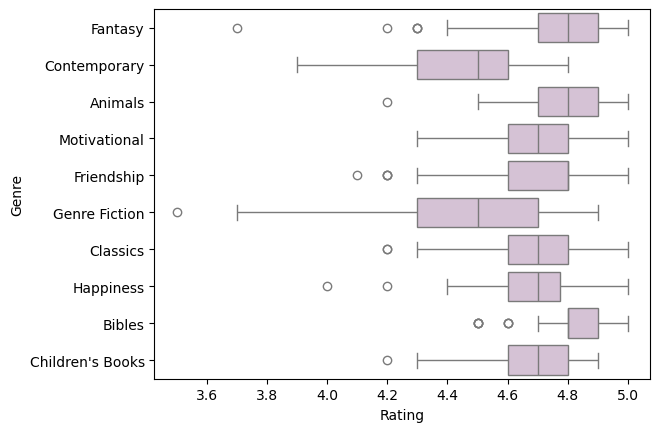

In [12]:
# keeps all books that are part of top 10 genres
df_top = df[df['Genre'].isin(top_genre.index)]

# plot rating distribution by genre
sns.boxplot(data=df_top, x='Rating', y='Genre', color='thistle')